In [ ]:
# https://github.com/nikitaa30/Content-based-Recommender-System/blob/master/recommender_system.py
# https://heartbeat.fritz.ai/recommender-systems-with-python-part-i-content-based-filtering-5df4940bd831

## Building NLP Content-based RS
##### https://medium.com/@armandj.olivares/building-nlp-content-based-recommender-systems-b104a709c042
##### https://github.com/ArmandDS/jobs_recommendations/blob/master/job_analysis_content_recommendation.ipynb


### Clean Text

In [30]:
import pandas as pd
import numpy as np
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/reginaduval/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/reginaduval/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/reginaduval/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/reginaduval/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [31]:
# text cleaning code below but decided not to use

In [32]:
ds = pd.read_csv('Data/reviews10k_grouped_full.csv')

In [33]:
ds.shape

(10000, 23)

### Extract features from text

In [34]:
pd.set_option('display.max_columns', 100)
ds = pd.read_csv('Data/reviews10k_grouped_full.csv')
ds.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,authors_y,original_title_y,review_text,full_text
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,2008.0,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,Suzanne Collins,The Hunger Games,I cracked and finally picked this up. Very enj...,"2008.0 The Hunger Games (The Hunger Games, #1)..."
1,2,3,3,4640799,491,439554934,9.780440e+12,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,Tuve el gusto de leerlo antes de que saliera l...,1997.0 Harry Potter and the Sorcerer's Stone (...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,2005.0,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,Stephenie Meyer,Twilight,"If I was 15, I would have LOVED this. It wasn'...","2005.0 Twilight (Twilight, #1) en-US Stephenie..."
3,4,2657,2657,3275794,487,61120081,9.780061e+12,1960.0,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,Harper Lee,To Kill a Mockingbird,"Still relevant and beautiful.,R.I.P. Ms. Harpe...",1960.0 To Kill a Mockingbird eng Harper Lee To...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,1925.0,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,F. Scott Fitzgerald,The Great Gatsby,I read this classic twice in high school. Its ...,1925.0 The Great Gatsby eng F. Scott Fitzgeral...


In [35]:
# for tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_rev = tfidf_vectorizer.fit_transform((ds['full_text']))
tfidf_rev

<10000x1299420 sparse matrix of type '<class 'numpy.float64'>'
	with 41214251 stored elements in Compressed Sparse Row format>

In [36]:
# for count
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

count_rev = count_vectorizer.fit_transform((ds['full_text']))
count_rev

<10000x1299420 sparse matrix of type '<class 'numpy.int64'>'
	with 41214251 stored elements in Compressed Sparse Row format>

### Evaluating the recommendations

In [101]:
ds[ds['authors_y'] == 'Harper Lee']

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,authors_y,original_title_y,review_text,full_text
3,4,2657,2657,3275794,487,61120081,9.780061e+12,1960.0,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,Harper Lee,To Kill a Mockingbird,"Still relevant and beautiful.,R.I.P. Ms. Harpe...",1960.0 To Kill a Mockingbird eng Harper Lee To...
532,533,24817626,24817626,44458285,102,62409859,9.780062e+12,2015.0,Go Set a Watchman,eng,3.31,138669,164828,24535,8284,26200,58810,48468,23066,Harper Lee,Go Set a Watchman,"Didn't hold a candle to TKAM, kind of blah and...",2015.0 Go Set a Watchman eng Harper Lee Go Set...


In [102]:
#insert goodreads_book_id
g = 24817626
index = np.where(ds['goodreads_book_id'] == g)[0][0]
read_book = ds.iloc[[index]]
read_book

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,authors_y,original_title_y,review_text,full_text
532,533,24817626,24817626,44458285,102,62409859,9.780062e+12,2015.0,Go Set a Watchman,eng,3.31,138669,164828,24535,8284,26200,58810,48468,23066,Harper Lee,Go Set a Watchman,"Didn't hold a candle to TKAM, kind of blah and...",2015.0 Go Set a Watchman eng Harper Lee Go Set...


### Content based RS with TfidfVectorizer

In [103]:
from sklearn.metrics.pairwise import cosine_similarity
book_tfidf = tfidf_vectorizer.transform(read_book['full_text'])
cos_similarity_tfidf = map(lambda x: cosine_similarity(book_tfidf, x), tfidf_rev)
output = list(cos_similarity_tfidf)

### Content based RS with CountVectorizer

In [104]:
from sklearn.metrics.pairwise import cosine_similarity
book_count = count_vectorizer.transform(read_book['full_text'])
cos_similarity_countv = map(lambda x: cosine_similarity(book_count, x), count_rev)
output2 = list(cos_similarity_countv)

### Top recommendations

In [105]:
def get_recommendation(top, ds, scores):
  recommendation = pd.DataFrame(columns = ['goodreads_book_id', 'authors', 'title', 'score'])
  count = 0
  for i in top:
      recommendation.at[count, 'goodreads_book_id'] = ds.iloc[i, 2]
      recommendation.at[count, 'authors'] = ds.iloc[i, 19]
      recommendation.at[count, 'title'] = ds.iloc[i, 8]
      recommendation.at[count, 'score'] =  scores[count]
      count += 1
  return recommendation

In [106]:
# for tfidf
top = sorted(range(len(output)), key=lambda i: output[i], reverse=True)[:10]
list_scores = [output[i][0][0] for i in top]
get_recommendation(top, ds, list_scores)

,goodreads_book_id,authors,title,score
0,24817626,Harper Lee,Go Set a Watchman,1
1,2657,Harper Lee,To Kill a Mockingbird,0.919246
2,40483,"Pauline Réage, Sabine d'Estree",Story of O (Story of O #1),0.768097
3,13103,James Redfield,"The Celestine Prophecy (Celestine Prophecy, #1)",0.763331
4,13496,George R.R. Martin,"A Game of Thrones (A Song of Ice and Fire, #1)",0.762676
5,9595650,Kevin Hearne,"Hexed (The Iron Druid Chronicles, #2)",0.762371
6,24529123,Marieke Nijkamp,This Is Where It Ends,0.762275
7,28802599,"Paul Pen, Simon Bruni",The Light of the Fireflies,0.761347
8,9595620,Kevin Hearne,"Hammered (The Iron Druid Chronicles, #3)",0.761214
9,10047589,Jennifer Close,Girls in White Dresses,0.760931


In [107]:
# for count
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
get_recommendation(top, ds, list_scores)

,goodreads_book_id,authors,title,score
0,24817626,Harper Lee,Go Set a Watchman,1
1,2657,Harper Lee,To Kill a Mockingbird,0.973802
2,40483,"Pauline Réage, Sabine d'Estree",Story of O (Story of O #1),0.968314
3,38447,Margaret Atwood,The Handmaid's Tale,0.966034
4,6149,Toni Morrison,Beloved,0.965352
5,80660,Lionel Shriver,We Need to Talk About Kevin,0.964762
6,662,"Ayn Rand, Leonard Peikoff",Atlas Shrugged,0.963941
7,153008,Jacqueline Carey,"Kushiel's Dart (Phèdre's Trilogy, #1)",0.963018
8,17225311,Alissa Nutting,Tampa,0.962204
9,12296,"Nathaniel Hawthorne, Thomas E. Connolly, Nina ...",The Scarlet Letter,0.962126


In [52]:
# build a wordcloud from full_text
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import itertools

In [53]:
review_text = itertools.islice(ds.full_text, 5000)
review_text = list(review_text)
review_text

In [54]:
#review_text = itertools.islice(ds.review_text, 10000)
#review_text = list(review_text)
bunch_text = " ".join(str(text) for text in review_text[:1500])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", colormap= "magma").generate(bunch_text)

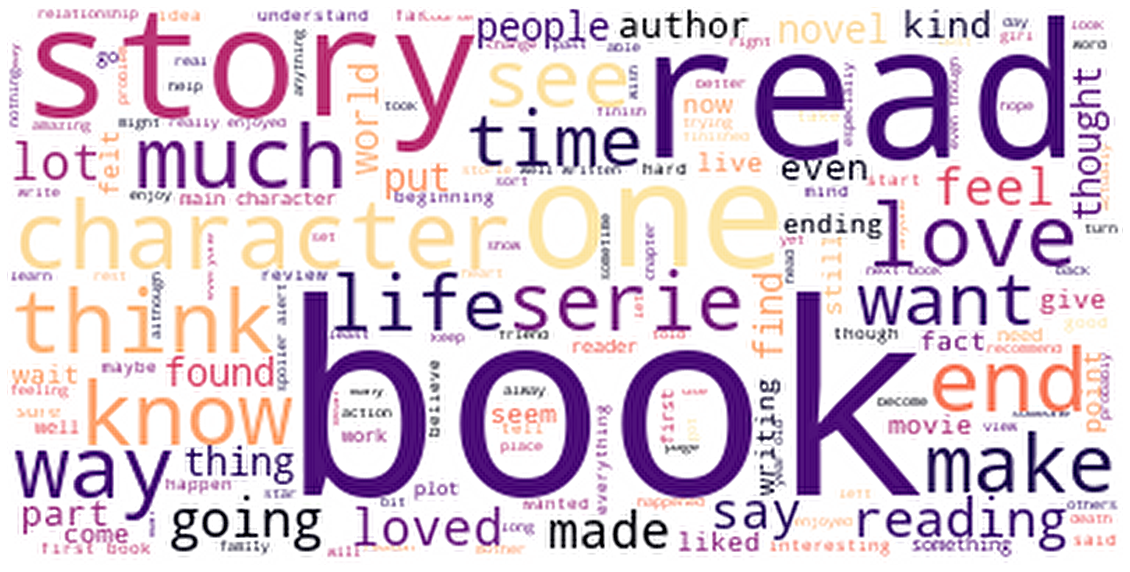

In [55]:
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation="sinc")
plt.axis("off")
plt.show()

### Another code for content filtering recommendations

In [82]:
tf = TfidfVectorizer(ngram_range = (1, 2), min_df = 0.1, stop_words = 'english')
tfidf_matrix = tf.fit_transform(ds['full_text'])

In [83]:
from sklearn.metrics.pairwise import linear_kernel

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
results = {}

for idx, row in ds.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], ds['goodreads_book_id'][i]) for i in similar_indices]
    
    results[row['goodreads_book_id']] = similar_items[1:]
    
print('done!')

done!


In [97]:
def item(id):
    return ds.loc[ds['goodreads_book_id'] == id]['title'].tolist()[0].split(' - ')[0]

def recommend(book_id, num):
    print('Recommending ' + str(num) + ' books similar to ' + item(book_id) + '...')
    print('-------')
    recs = results[book_id][:num]
    for rec in recs:
        print('Recommended: ' + item(rec[1]) + ' (score:' + str(rec[0]) + ')')

In [98]:
recommend(book_id = 452235, num = 20)
# similarity scores are lower than those in the tfidf model above

Recommending 20 books similar to The Firm...
-------
Recommended: The Firm (Penguin Readers, Level 5) (score:0.8314064853074106)
Recommended: The Associate (score:0.7252064394112272)
Recommended: The Litigators (score:0.6891584988438849)
Recommended: The Partner (score:0.6097995993510026)
Recommended: The Rainmaker (score:0.5865534849110335)
Recommended: The Racketeer (score:0.5796364265800835)
Recommended: Gray Mountain (score:0.5710826256447494)
Recommended: The Street Lawyer (score:0.5593253053845226)
Recommended: A Time to Kill (score:0.5503377879395019)
Recommended: The Pelican Brief (score:0.5390642777935718)
Recommended: The Whistler (score:0.5237721565954023)
Recommended: The King of Torts (score:0.5182374572091927)
Recommended: The Broker (score:0.5120380444896558)
Recommended: The Runaway Jury (score:0.5098267763040856)
Recommended: Practice Makes Perfect (Berkley Sensation) (score:0.5054631460182043)
Recommended: A Prayer for Owen Meany (score:0.5046624001166825)
Recommended

In [86]:
# use this search to find goodreads_book_id for rs code above
ds[ds['authors_y'] == 'Tana French']

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,authors_y,original_title_y,review_text,full_text
472,473,237209,237209,3088141,78,670038601,9.780670e+12,2007.0,"In the Woods (Dublin Murder Squad, #1)",eng,3.74,188024,201721,15392,6553,15636,51430,77182,50920,Tana French,In the Woods,I really liked this book even though it was de...,"2007.0 In the Woods (Dublin Murder Squad, #1) ..."
1324,1325,1914973,1914973,6504351,56,670018864,9.780670e+12,2008.0,"The Likeness (Dublin Murder Squad, #2)",eng,4.05,72480,80243,6945,915,2856,14814,34478,27180,Tana French,The Likeness,Word on the street was that this book wasn't a...,"2008.0 The Likeness (Dublin Murder Squad, #2) ..."
1910,1911,7093952,7093952,7350661,65,670021873,9.780670e+12,2010.0,"Faithful Place (Dublin Murder Squad, #3)",eng,3.97,55355,61097,5736,584,2205,13196,27712,17400,Tana French,Faithful Place,Another compelling Dublin Murder Squad install...,"2010.0 Faithful Place (Dublin Murder Squad, #3..."
2206,2207,10805160,10805160,15718578,2,1444705105,9.781445e+12,2012.0,"Broken Harbour (Dublin Murder Squad, #4)",eng,3.92,36704,50491,5418,573,2100,11404,22954,13460,Tana French,Broken Harbor,I LOVED this book...did not want it to end. Ch...,"2012.0 Broken Harbour (Dublin Murder Squad, #4..."
2887,2888,20821043,20821043,21598636,44,670026328,9.780670e+12,2014.0,"The Secret Place (Dublin Murder Squad, #5)",eng,3.83,30834,38667,4883,729,2363,9360,16607,9608,Tana French,The Secret Place,This is my favorite French book since The Like...,"2014.0 The Secret Place (Dublin Murder Squad, ..."
4110,4111,29430013,29430013,48321130,27,670026336,9.780670e+12,2016.0,The Trespasser (Dublin Murder Squad #6),eng,3.98,18805,29204,3688,298,1184,5995,13140,8587,Tana French,NaN,Tana French has done it again: written another...,2016.0 The Trespasser (Dublin Murder Squad #6)...
